### Useful Packages

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150

ModuleNotFoundError: No module named 'matplotlib'

## Loading Data

Primary: Use pandas package to read in R style > pd.read_csv , pickle, excel, etc.

Secondary: Use brute force reader by opening connection

### Validation Steps:

1. Collect Data   
   - Merging Techniques   
   - API calls   
   - Data Loading   
2. Data Exploration & Pre-Processing 
    - Check var types
    - Check for & understand missing values
    - Summary Plots - skewed/imbalanced, outliers 
3. Pre-processing
    - Cleaning - imputation, outlier removal, simplify text, etc.
    - Statistical Feature Engineering - standardization, dummy, binning
    - Expert-Informed Feature Engineering - make variables relevant to the task

In [3]:
# Read in Data
intuit75k = pd.read_pickle("data/intuit75k.pkl")

### Exploratory Analysis

In [ ]:
# Summary of each var - check range, 
intuit75k.describe()

,id,zip_bins,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,training,res1_yes
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000
mean,37500.500000,10.498333,0.245080,2.076280,93.087133,15.838427,15.657173,0.21400,0.028693,0.208387,0.700000,0.048013
std,21650.779432,5.765751,0.430137,1.241355,81.205900,9.539057,10.026312,0.41013,0.166944,0.406157,0.458261,0.213796
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,18750.750000,5.000000,0.000000,1.000000,37.000000,8.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,37500.500000,10.000000,0.000000,2.000000,71.000000,15.000000,14.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,56250.250000,15.000000,0.000000,3.000000,124.500000,24.000000,24.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,75000.000000,20.000000,1.000000,5.000000,1149.000000,36.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Check Var Types 
#intuit75k.dtypes
intuit75k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          75000 non-null  int32   
 1   zip5        75000 non-null  object  
 2   zip_bins    75000 non-null  int32   
 3   sex         75000 non-null  category
 4   bizflag     75000 non-null  int32   
 5   numords     75000 non-null  int32   
 6   dollars     75000 non-null  float64 
 7   last        75000 non-null  int32   
 8   sincepurch  75000 non-null  int32   
 9   version1    75000 non-null  int32   
 10  owntaxprod  75000 non-null  int32   
 11  upgraded    75000 non-null  int32   
 12  res1        75000 non-null  category
 13  training    75000 non-null  int32   
 14  res1_yes    75000 non-null  int64   
dtypes: category(2), float64(1), int32(10), int64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
# View first few rows of data for reference, can help compare to var type
intuit75k.head(10)

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0
5,6,12309,3,Male,0,1,20.0,17,17,0,0,1,No,1,0
6,7,22980,5,Male,0,1,49.5,13,36,1,0,0,No,0,0
7,8,55122,11,Male,1,1,24.5,4,17,1,0,0,No,1,0
8,9,34950,8,Male,0,1,44.5,15,4,0,0,0,No,0,0
9,10,20036,5,Male,0,3,73.5,10,9,0,0,0,No,1,0


In [4]:
#Adjust var types, if necessary

# Looks like zip_bins should be category instead of int...
intuit75k["zip_bins"] = intuit75k["zip_bins"].astype('category')
# Putting this as numeric, otherwise too many categories
intuit75k["zip5"] = intuit75k["zip5"].astype('int')

In [ ]:
# Boxplot for numeric variables
numeric_cols = intuit75k.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    sns.boxplot(x=intuit75k[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [5]:
# Clean Dependent Var for Classification
intuit75k["res1_yes"] = [1 if i == "Yes" else 0 for i in intuit75k.res1]

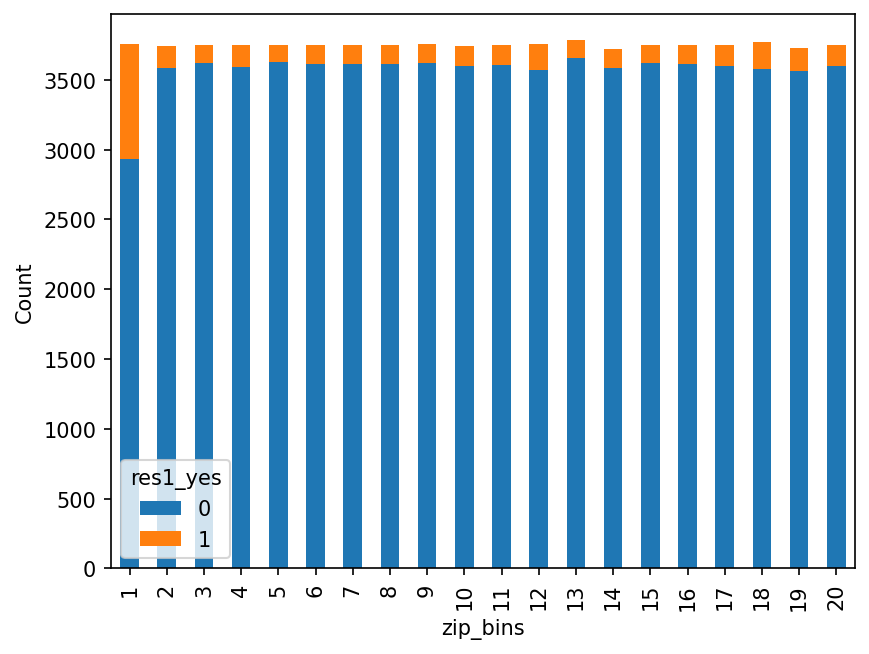

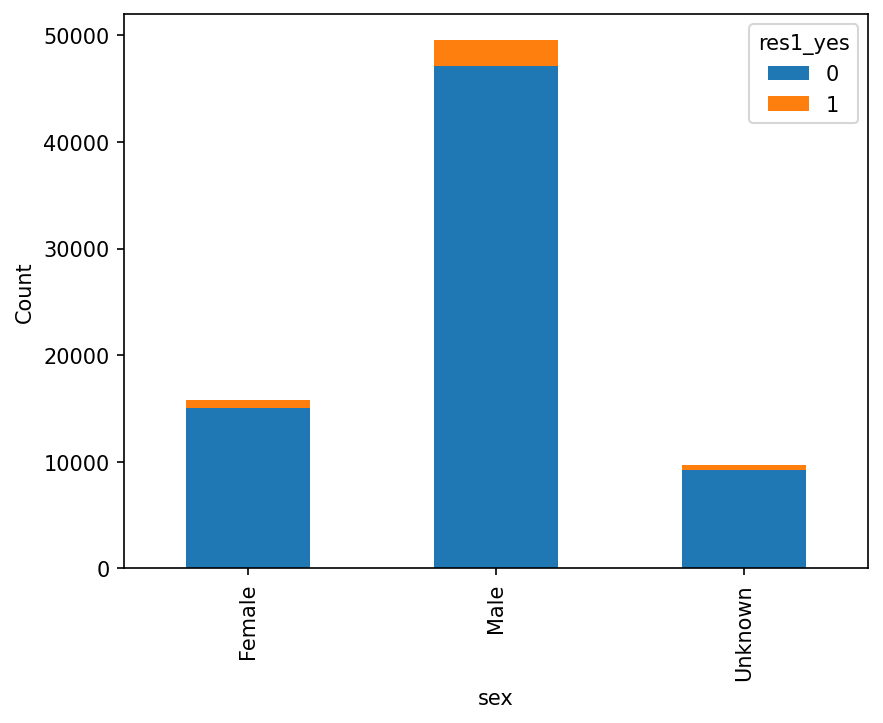

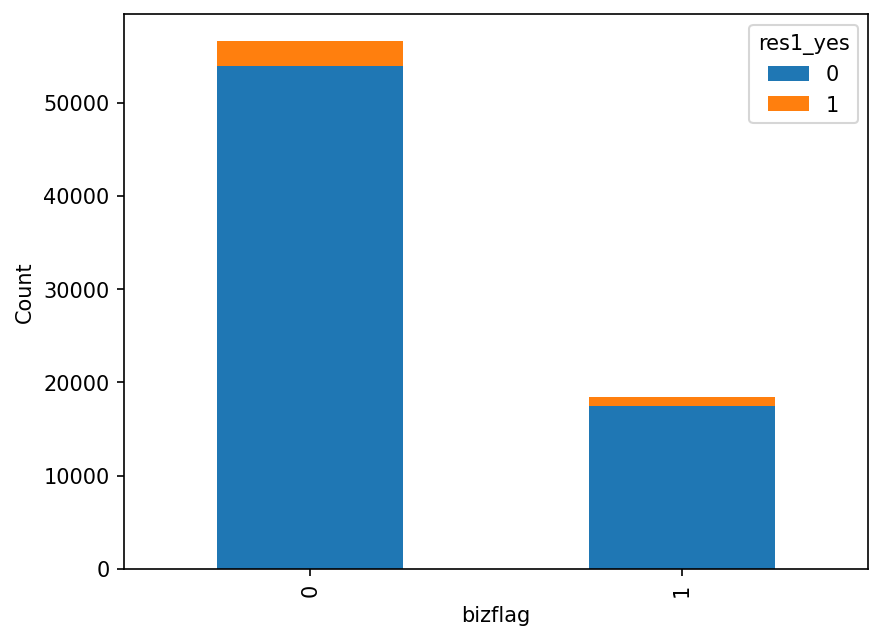

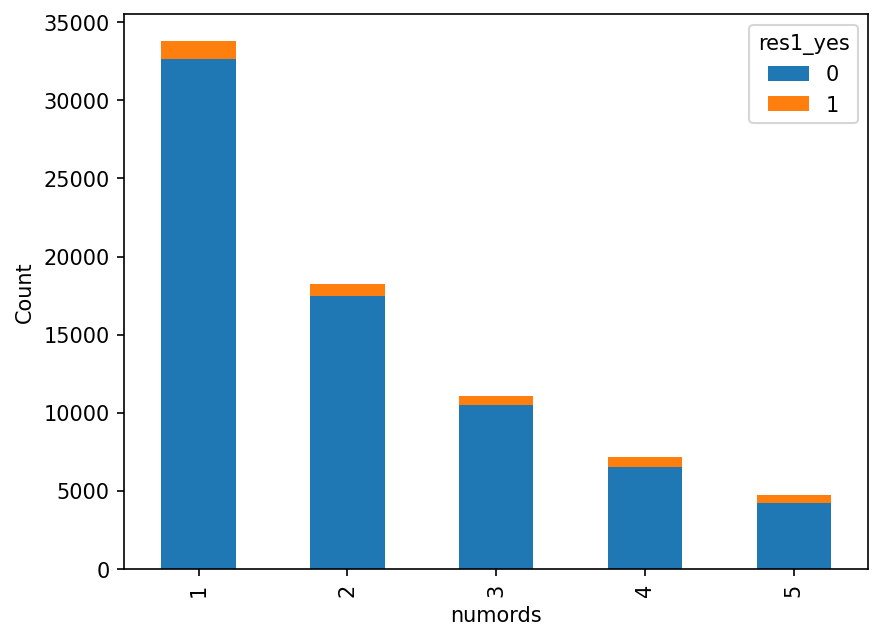

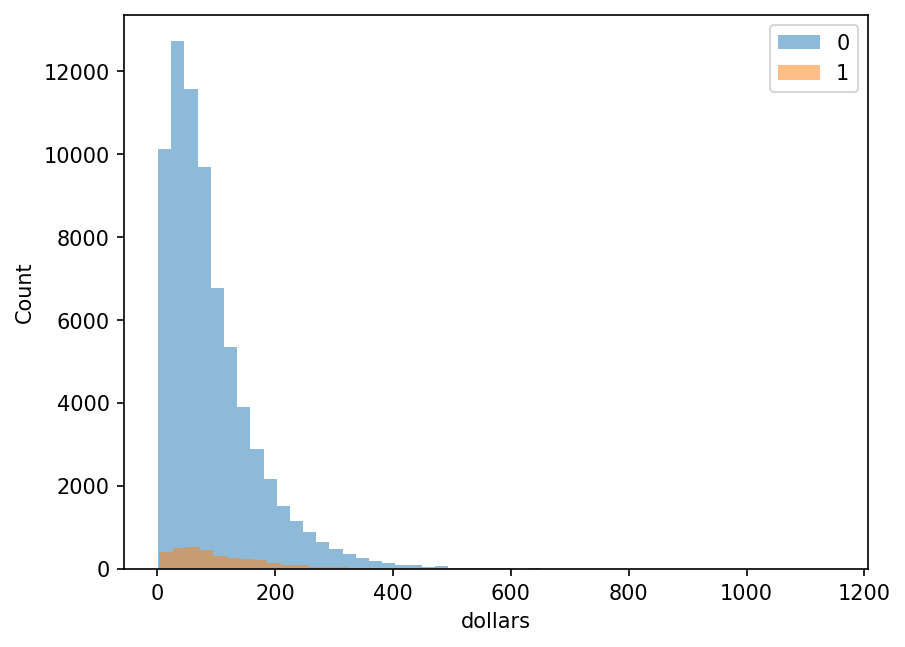

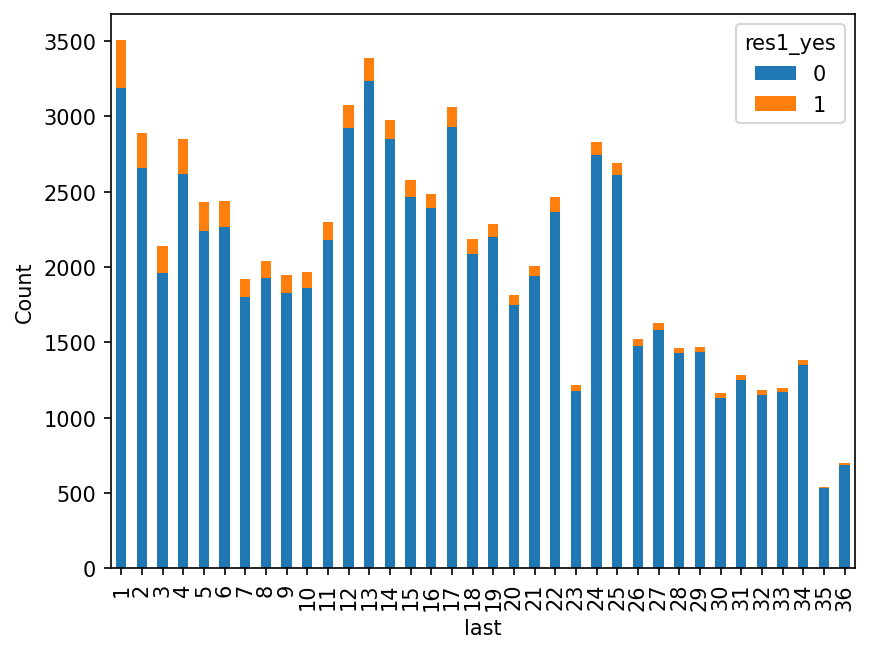

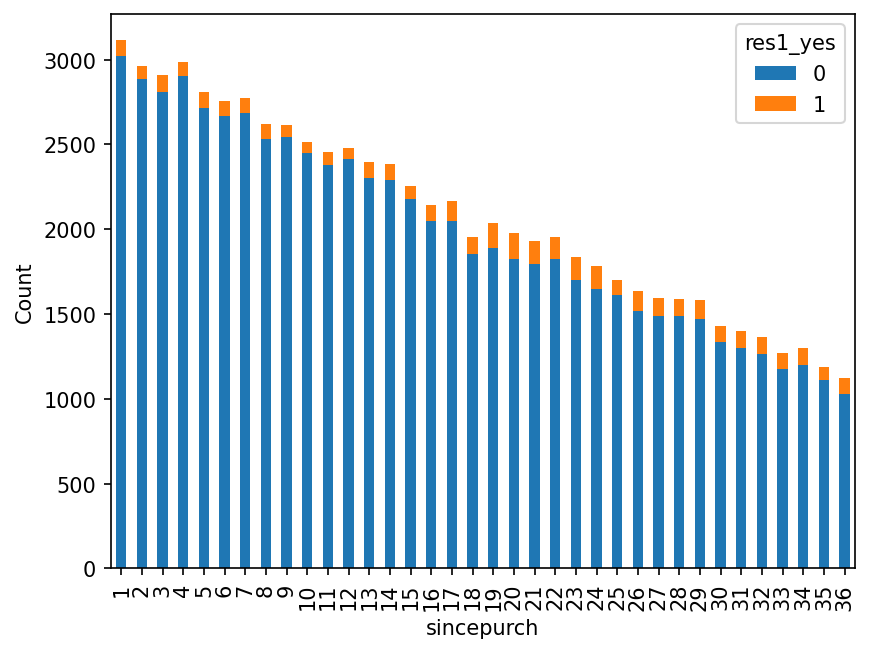

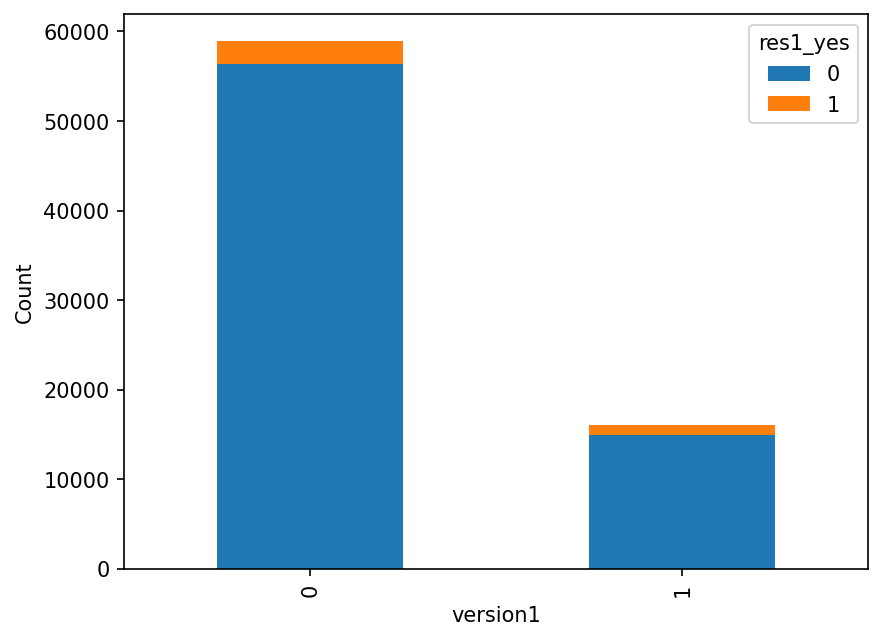

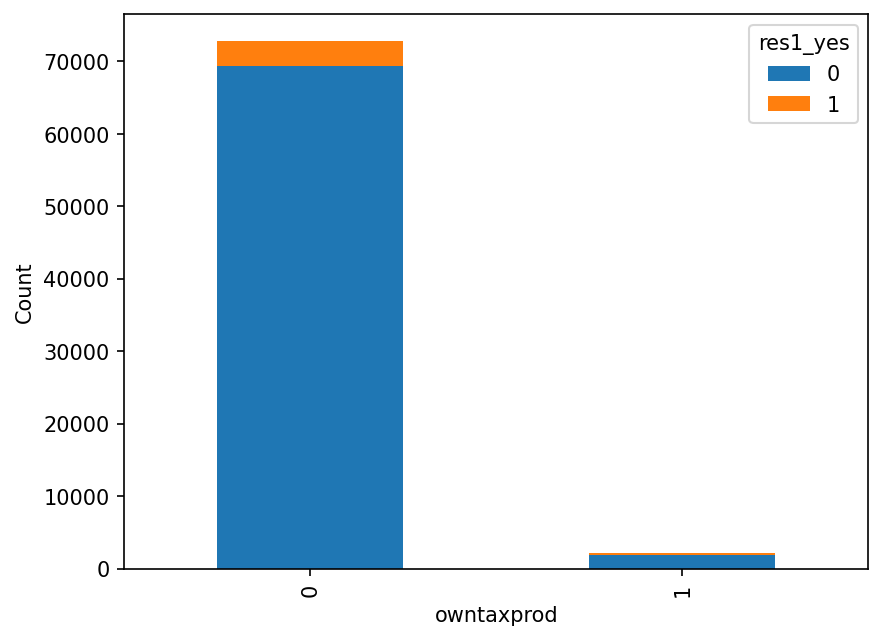

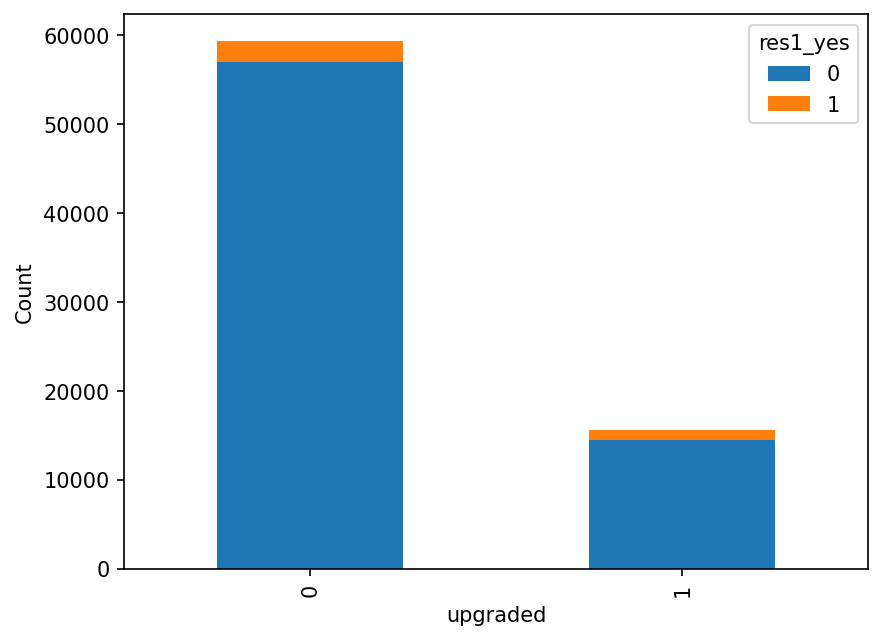

In [6]:
# Distribution Plots, could make into function... 
intuit75k_for_scatterplot = intuit75k.copy().query('training == 1')
intuit75k_for_scatterplot = intuit75k[['res1_yes', 'zip_bins', 'sex', 'bizflag', 'numords', \
                                        'dollars', 'last', 'sincepurch', 'version1', 'owntaxprod', 'upgraded']]

# Plot each explanatory variable against the response variable
for explanatory in intuit75k_for_scatterplot.columns[1:]:
    if len(intuit75k_for_scatterplot[explanatory].unique()) < 100:
        counts = intuit75k_for_scatterplot.groupby([explanatory, 'res1_yes']).size().unstack()
        counts.plot(kind='bar', stacked=True)
        plt.xlabel(explanatory)
        plt.ylabel('Count')
        plt.show()
    
    else:
        # Plot a histogram instead of a bar chart
        no_df = intuit75k_for_scatterplot[intuit75k_for_scatterplot['res1_yes'] == 0]
        yes_df = intuit75k_for_scatterplot[intuit75k_for_scatterplot['res1_yes'] == 1]
        
        plt.hist(no_df[explanatory], bins=50, alpha=0.5, label='0')
        plt.hist(yes_df[explanatory], bins=50, alpha=0.5, label='1')
        
        plt.xlabel(explanatory)
        plt.ylabel('Count')
        plt.legend()
        plt.show()

#distr_plot(intuit75k)

In [10]:
# Missing values by column
# Missing values by column (including columns with 0% missing)
missing_summary = intuit75k.isnull().sum().to_frame('Missing Count')
missing_summary['Missing %'] = (missing_summary['Missing Count'] / len(intuit75k)) * 100
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)
missing_summary

,Missing Count,Missing %
id,0,0.0
zip5,0,0.0
zip_bins,0,0.0
sex,0,0.0
bizflag,0,0.0
numords,0,0.0
dollars,0,0.0
last,0,0.0
sincepurch,0,0.0
version1,0,0.0


In [ ]:
# Count duplicate rows
# could consider slices of duplicates here as well
duplicate_rows = intuit75k[intuit75k.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Identify columns with constant or close to constant values
nunique = intuit75k.nunique()
low_variance_cols = nunique[nunique <= 1]
print("Columns with constant values:\n", low_variance_cols)

Columns with constant values:
 Series([], dtype: int64)


In [17]:
# Number of unique values
cardinality = intuit75k.nunique().sort_values(ascending=False)
print("Unique Values:\n", cardinality)

Unique Values:
 id            75000
zip5           7079
dollars        1147
last             36
sincepurch       36
zip_bins         20
numords           5
sex               3
bizflag           2
version1          2
owntaxprod        2
upgraded          2
res1              2
training          2
res1_yes          2
dtype: int64


In [20]:
# Business rules - Ex: Dollars should be >= 0
invalid_age = intuit75k[intuit75k['dollars'] < 0]
print(f"Rows violating rule: {len(invalid_age)}")

Rows violating rule: 0


In [22]:
#Optional Text Cleaning
# Ex: Validate email/address format, filter out / replace misspelled entries
# Useful methods: str.lower(), str.strip(), str.replace(), str.split()

### Other Checks to Consider

- additional outlier analysis
- SQL query review
- Data drift, look at windows of the data
- Ranges - means, quartiles, standard dev, etc.
- Completeness 
- Working with time data
- Cleaning data, if necessary
- Think through some of the 'business rules'
- data delay, how frequently is it updated & put into DB, are different sources updated on different cadences
- spatiotemporal comparison, completeness

### Light Feature Engineering

In [ ]:
#Standardizing Numeric Cols
# Important for Logistic Reg, NN, other distance based approaches
# Not necessary for Random Forest, Gradient Boosting, & other tree-based algorithms

#Getting Dummy Vars for Categorical
# Important for Lin/Log Reg, NN, Random Forest, Decision Trees, Gradient Boosting, pretty much all...
# Not Necessary for certain model packages that handle within model (smf.glm(), CatBoost, LightGBM)

# 1. Separate target
X = intuit75k.drop(columns=['res1_yes', 'res1', 'training', 'id'])
y = intuit75k['res1_yes']
#training_col = intuit75k['training'] #if need to save this separately...

# 2. Standardize numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 3. Convert categorical variables to dummies
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 4. Define final list of vars for modeling
evar = [
    "zip5", 
    "bizflag", 
    "numords", 
    "dollars", 
    "last", 
    "sincepurch", 
    "version1", 
    "owntaxprod", 
    "upgraded",
    "sex_Male",
    "sex_Unknown"
]

X = X[evar]

#X.head(10)
X.info()

In [91]:
# Check for Multicollinearity
corr_matrix = X.corr()
print(corr_matrix)

# Optionally visualize
#import seaborn as sns
#import matplotlib.pyplot as plt

#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title("Feature Correlation Matrix")
#plt.show()

                 zip5   bizflag   numords   dollars      last  sincepurch  \
zip5         1.000000  0.001229  0.004873  0.006146 -0.001966   -0.002072   
bizflag      0.001229  1.000000  0.000197  0.002038 -0.000390   -0.005220   
numords      0.004873  0.000197  1.000000  0.585654 -0.130356    0.001763   
dollars      0.006146  0.002038  0.585654  1.000000 -0.074659    0.000815   
last        -0.001966 -0.000390 -0.130356 -0.074659  1.000000   -0.001169   
sincepurch  -0.002072 -0.005220  0.001763  0.000815 -0.001169    1.000000   
version1    -0.003003 -0.006011  0.005728  0.002217  0.002018    0.524144   
owntaxprod   0.002114  0.004565  0.119726  0.074988 -0.019854   -0.001149   
upgraded    -0.000479 -0.003080 -0.002755 -0.001420 -0.000192    0.511277   
sex_Male    -0.001152  0.006271  0.001556 -0.002026 -0.001045    0.004069   
sex_Unknown  0.000467  0.000588 -0.001988 -0.002329  0.004759   -0.003888   

             version1  owntaxprod  upgraded  sex_Male  sex_Unknown  
zip5  

In [ ]:
# Add additional feature engineering here...if necessary...

# Create Deciles / bins - remove original column if highly correlated

# RFM variables, if applicable

# Expert variables

# Interactions or transformations, if identified

# Can be useful to add in random value column to make sure everything is working properly... 'rnd'
